# 1. Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms

# 2. bring MNIST test dataset

In [3]:
mnist_test = dset.MNIST(root='./',
                        train=False,
                        transform=transforms.ToTensor(),
                        target_transform=None,
                        download=True)

# 3. type of data

mnist_test 길이: 10000
image data shape: torch.Size([1, 28, 28])
label           : 7


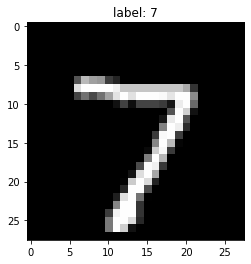

In [4]:
print(f'mnist_test 길이: {len(mnist_test)}')

# 데이터 하나의 형태
image, label = mnist_test.__getitem__(0) # 0번째 데이터
print(f'image data shape: {image.shape}')
print(f'label           : {label}')

# 그리기
img = image.numpy()
plt.title(f'label: {label}')
plt.imshow(img[0], cmap='gray')
plt.show()

# 4. implement sigmoid, sotfmax function

$$ g(z) = {1 \over 1 + \exp^{-z}}$$

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

$$ softmax(x) =  {\exp^ {x}_i \over \sum_j\exp^{x}_j}$$

In [6]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

# 5. Declare model

In [7]:
class MyMLP:
    """
        Multi-layered perceptron
        of units in each layer : 28*28 - 256 - 128 - 10
    """

    def __init__(self, n_input: int, n_hidden1: int, n_hidden2: int, n_out: int)\
            -> None:
        self.W1 = np.zeros((n_hidden1, n_input), dtype=np.float64)
        self.b1 = np.zeros((n_hidden1,), dtype=np.float64)

        self.W2 = np.zeros((n_hidden2, n_hidden1), dtype=np.float64)
        self.b2 = np.zeros((n_hidden2,), dtype=np.float64)

        self.W3 = np.zeros((n_out, n_hidden2), dtype=np.float64)
        self.b3 = np.zeros((n_out,), dtype=np.float64)

    def __call__(self, x: np.ndarray) -> np.ndarray:
        """
        :param x: MNIST image shape [1, 28, 28]
        :return: softmax(classes_num=10)
        """

        x = x.reshape(-1)

        x = sigmoid(np.dot(self.W1, x) + self.b1)
        x = np.dot(self.W2, x) + self.b2
        x = np.dot(self.W3, x) + self.b3

        return softmax(x)

# 6. Create model

In [8]:
model = MyMLP(n_input=28 * 28, n_hidden1=256, n_hidden2=128, n_out=10)
print(model.W1.shape, model.b1.shape)
print(model.W2.shape, model.b2.shape)
print(model.W3.shape, model.b3.shape)

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


# 7. load weights from pre-trained model

In [9]:
weights = np.load('./nets/mlp_weight.npz')
model.W1 = weights['W1']
model.b1 = weights['b1']
model.W2 = weights['W2']
model.b2 = weights['b2']
model.W3 = weights['W3']
model.b3 = weights['b3']

print(model.W1.shape, model.b1.shape)
print(model.W2.shape, model.b2.shape)
print(model.W3.shape, model.b3.shape)

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


# 8. test

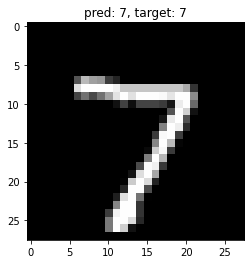

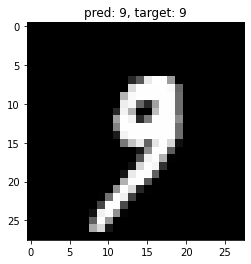

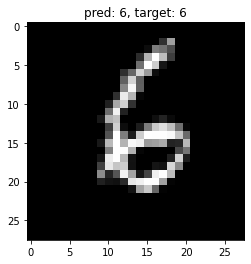

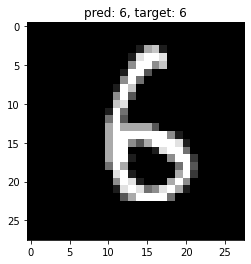

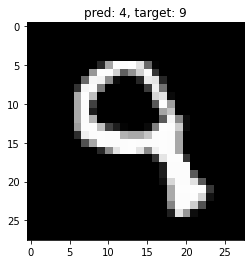

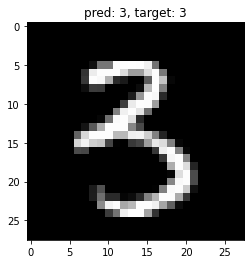

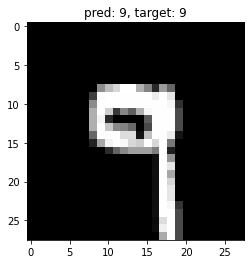

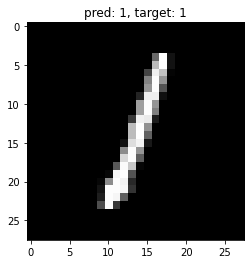

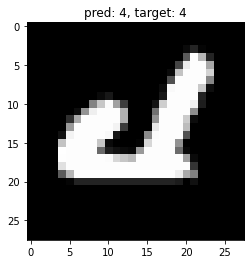

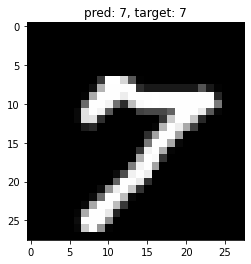

accuarcy: 91.91%


In [10]:
mysum = 0

m = len(mnist_test)
cnt = 0
for i in range(m):
    img, target = mnist_test.__getitem__(i)
    output = model(img)

    if i % 1000 == 0:
        img = img.numpy()
        pred_target = np.argmax(output)
        plt.title(f'pred: {pred_target}, target: {target}')
        plt.imshow(img[0], cmap='gray')
        plt.show()

    mysum += (np.argmax(output) == target)

print(f'accuarcy: {(mysum / m) * 100:.2f}%')